#**Implementation of Naive Bayes Classifier**
---
##Importing and defining Binary Dataset for Naive Bayes Classification


In [36]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Once we have imported all the required modules, the next step is to import the data set and split the data sets into inputs and outputs.

In [37]:
# importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Semester/Summer24/CSE436/NaiveBayes_Lab6.csv')
# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

The next step is to divide the input and output values into the training and testing part so that once the model’s training is complete, we can evaluate its performance using testing data.

In [38]:
# training and testing data
from sklearn.model_selection import train_test_split
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.25, random_state=0)

We set test_size=0.25, which means 25% of the whole data set will be assigned to the testing part, and the remaining 75% will be used for the model’s training.

The next step is to scale our dataset to be ready to be used for the training.

In [39]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

Note: scaling (or standardization) of a dataset is a common requirement for many machine learning estimators: they might misbehave if the individual features do not more or less look like standard normally distributed data.

##Training the model using Bernoulli Naive Bayes classifier

We’ll use the Bernoulli Naive Bayes classifier in this article section to train our model.

In [40]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB
# initializaing the NB
classifer = BernoulliNB()
# training the model
classifer.fit(X_train, y_train)
# testing the model
y_pred = classifer.predict(X_test)

Now let us check the accuracy of the predicted values using the Bernoulli Naive Bayes classifier.

In [41]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.8


We got an accuracy of 80% when we trained our model using Bernoulli Naive Bayes classifier.

##Training model using Gaussian Naive Bayes Classifier

Now, let’s train our model using the Gaussian Naive Bayes classifier (a type of Naive Bayes Classifier).

In [42]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer1 = GaussianNB()
# training the model
classifer1.fit(X_train, y_train)
# testing the model
y_pred1 = classifer1.predict(X_test)

Let’s check the accuracy of our model:

In [43]:
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test,y_pred1))

0.91


This time we got an accuracy of 91% when we trained the model on the same dataset.

##Evaluating Naive Bayes Classification performance
This article’s part will demonstrate how to evaluate the performance of the Naive Bayes classification model.

##Confusion Matrix for Binary classification
The confusion matrix is also known as the error matrix. It is a table layout that allows visualization of the performance of a classification algorithm. Each row of the matrix represents the instances in an actual class of a class variable. In contrast, each column represents the instances in a predicted class with class probabilities or vice versa.

The confusion matrix for binary classification is a 2×2 matrix representing the actual and predicted values. It helps us calculate accuracy, precision, recall, and f1-score, which helps us evaluate the model’s performance.

##Evaluation of Bernoulli Naive Bayes classifier
Let’s evaluate ourBernoulli Naive Bayes model using a confusion matrix that will visually help us see the number of correct and incorrect classified classes. First of all, we’ll visualize our model’s results. The predicted values are stored in a variable named y_pred, the target variable.



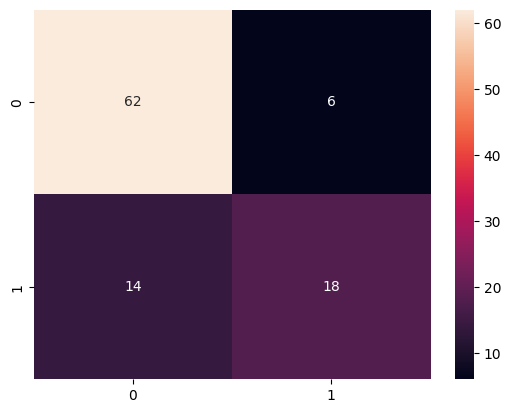

In [44]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

The confusion matrix helps us know which class has been mispredicted.

We can also print the classification report, which will help us further evaluate our model’s performance.

In [45]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        68
           1       0.75      0.56      0.64        32

    accuracy                           0.80       100
   macro avg       0.78      0.74      0.75       100
weighted avg       0.79      0.80      0.79       100



##Evaluation of Gaussian Naive Bayes Classifier
Let’s evaluate theGaussian Naive Bayes model. The predicted values are stored in a variable named y_pred1.

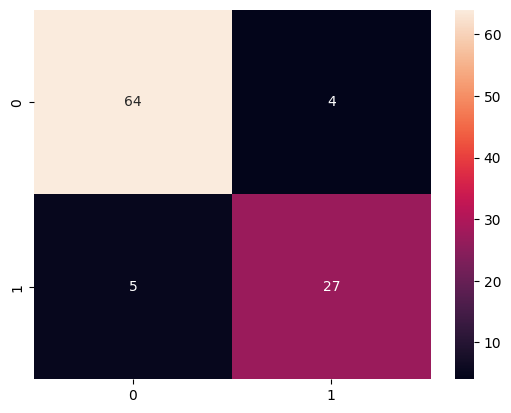

In [46]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred1)
# true write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

**Note:** the Gaussian naive Bayes classifier performed very well on this dataset, as shown in the confusion matrix. Let us now print out the classification report as well,



In [47]:
# importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



##Features Encoding
In real life, the data does not always consist of numeric values. For example, playing or not playing are not numeric values. In such scenarios, we need to convert the non-numeric data to numeric values before feeding data to our model. For example, we have the following dataset about whether players will play sports or not, depending on the weather and temperature.

In [48]:
# assigning features and label variables
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
# output class
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

Note: the input and output are not numeric values. Before feeding this data to our model, we have to encode the non-numeric values into numeric ones. for example, Overcast = 0, Rainy = 1, Sunny = 2. This is called label encoding.

In [49]:
# Import LabelEncoder
from sklearn import preprocessing
# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=labelCode.fit_transform(weather)

The LabelEncoder will convert the string values to numeric values. For example, if we print the encoded weather, it will no longer contain numeric values.

In [50]:
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Similarly, we can also encode the play class.

In [51]:
# import LabelEncoder
from sklearn import preprocessing
# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()
# converting string labels into numbers.
label=labelCode.fit_transform(play)

##Generating model
We have already seen that our input values are in a single-dimensional array. By default, the model training takes values in multi-dimensional arrays. We will get the following error if we feed the data without further changes.

In [52]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
model = GaussianNB()
# train the model using the training sets
model.fit(weather_encoded, label)

ValueError: Expected 2D array, got 1D array instead:
array=[2 2 0 1 1 1 0 2 2 1 2 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

So, we need to convert our data to the 2D array before feeding it to our model. Here we will use NumPy array and reshape() method to create a 2D array.

In [53]:
# importing numpy module
import numpy as np
# converting 1D array to 2D
weather_2d = np.reshape(weather_encoded, (-1, 1))

Now our data is ready. We can train our model using this data.

In [54]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
model = GaussianNB()
# train the model using the training sets
model.fit(weather_2d, label)

GaussianNB()

We used the Gaussian Naive Bayes classifier to train our model. Let us predict the output by providing a testing input.

In [55]:
# predicting the odel
predicted= model.predict([[0]]) # 0:Overcast
# printing predicted value
print(predicted)

[1]


The output value 1 indicates that players will Play when there’s an Overcast weather.
##Naive Bayes Classification with Multiple Labels
Up to this point, we have learned Naive Bayes classification with binary labels. This section will teach about Naive Bayes classification for multiple labels. For example, if we want to categorize a news story regarding technology, entertainment, politics, or sports.

For the training, we will use the built-in data set from the sklearn module named load_wine. This dataset results from a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

The dataset consists of 13 features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three types of wine Class_0, Class_1, and Class_3. We can build a model to classify the type of wine using the Naive Bayes Classification.

##Loading and Exploring the dataset
First, we need to import datasets from the sklearn module and load the load_wine().

In [56]:
# import scikit-learn dataset library
from sklearn import datasets
# load dataset
dataset = datasets.load_wine()

Next, we can print the input/features and target/output variables’ names to ensure the desired dataset.

In [57]:
# print the names of the 13 features
print ("Inputs: ", dataset.feature_names)
# print the label type of wine
print ("Outputs: ", dataset.target_names)

Inputs:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Outputs:  ['class_0' 'class_1' 'class_2']


We check the type of data (numeric/non-numeric) by printing three rows from the dataset.

In [58]:
# print the wine data features
print(dataset.data[0:3])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


We can also check the output values to verify that it is a multi-class classification dataset.



In [59]:
# print the wine labels
print(dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


##Training the model using multiclass labels
Before feeding the dataset to our model, let us split the dataset into training and testing parts to evaluate our model by providing the testing dataset.



In [60]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# input and outputs
inputs = dataset.data
outputs = dataset.target
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=1)

Once the splitting is complete, we can feed our model with the training data.

In [61]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# create a Gaussian Classifier
classifer = GaussianNB()
# train the model using the training sets
classifer.fit(X_train, y_train)
# predict the response for test dataset
y_pred = classifer.predict(X_test)

Note: we have used the Gaussian Naive Bayes classification method for the training.

Let us now check the accuracy of our model:



In [62]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# printing accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


We got 98% accurate results, which is pretty high accuracy.

##Evaluation of Naive Bayes Classifier for multi-classification
The Confusion Matrix is not only used to evaluate binary classification. It can also help evaluate multiclass-classification problems as well. The number of columns/rows will equal the number of output classes.

Let’s evaluate our model, which was trained by multi-labeled data using a confusion matrix.

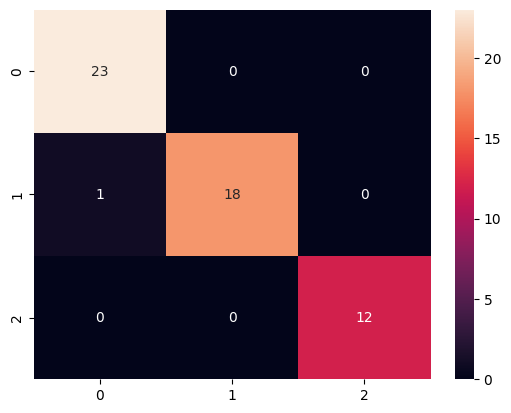

In [63]:
# importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)
# true Write data values in each cell of the matrix
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

Note: there were three labels in our dataset, as shown in the confusion matrix.

Let us now print out the classification score for our model.

In [64]:
# Importing classification report
from sklearn.metrics import classification_report
# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



##Naive Bayes Classification using sklearn and AWS SageMaker Studio
Let’s implement the Naive Bayes classification in AWS SageMaker Studio using Python version 3.7.10. First, we must import the data set and split it into the training and testing part.

In [65]:
# importring modules
import matplotlib.pyplot as plt
import pandas as pd
# importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Semester/Summer24/CSE436/NaiveBayes_Lab6.csv')
# split the data into inputs and outputs
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values
# training and testing data
from sklearn.model_selection import train_test_split
# assign test data size 25%
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=0)
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
# scalling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
# importing bernoulli NB
from sklearn.naive_bayes import BernoulliNB
# initializaing the NB
classifer=BernoulliNB()
# training the model
classifer.fit(X_train, y_train)
# testing the model
y_pred = classifer.predict(X_test)
# importing accuracy score
from sklearn.metrics import accuracy_score
# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

0.8


Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to classify based on probability calculations and conditional probabilities. It has three main types; Gaussian classifier, Bernoulli Casslifier, and Multinomial Classifier, and is used by various applications from different industries, including Business, Health, Technology, Environment, etc. This article covered the Naive Bayes classification algorithm implementation using Python and AWS SageMaker Studio and how the Naive Bayes classifier is used.

Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to classify based on probability calculations and conditional probabilities. It has three main types; Gaussian classifier, Bernoulli Casslifier, and Multinomial Classifier, and is used by various applications from different industries, including Business, Health, Technology, Environment, etc. This article covered the Naive Bayes classification algorithm implementation using Python and AWS SageMaker Studio and how the Naive Bayes classifier is used.

Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to classify based on probability calculations and conditional probabilities. It has three main types; Gaussian classifier, Bernoulli Casslifier

Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to classify based on probability calculations and conditional probabilities. It has three main types; Gaussian classifier, Bernoulli Casslifier, and Multinomial Classifier, and is used by various applications from different industries, including Business, Health, Technology, Environment, etc. This article covered the Naive Bayes classification algorithm implementation using Python and AWS SageMaker Studio and how the Naive Bayes classifier is used.

Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to classify based on probability calculations and conditional probabilities. It has three main types; Gaussian classifier, Bernoulli Casslifier

Summary
Naive Bayes Classification is a Supervised Machine Learning algorithm used to